## K-Means Clustering

### Loading data

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris_data=load_iris()
iris = pd.DataFrame(data=iris_data['data'], columns=[col[:-5] for col in iris_data['feature_names']])
y_true=iris_data['target']
cols=['petal length', 'petal width']
iris=iris[cols]
iris.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


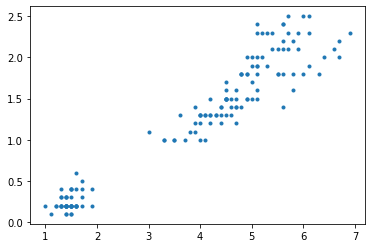

In [2]:
import matplotlib.pyplot as plt

plt.plot(iris['petal length'], iris['petal width'], 'o', ms=3)
plt.show()

In [3]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2, random_state=42)
kmeans.fit(iris)

y_pred=kmeans.predict(iris)

In [4]:
type(y_pred)

numpy.ndarray

In [5]:
np.unique(y_pred)

array([0, 1], dtype=int32)

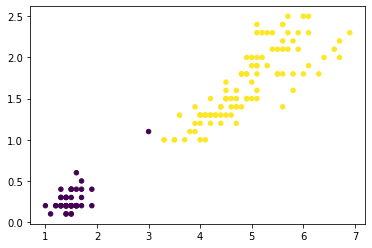

In [6]:
plt.scatter(iris['petal length'], iris['petal width'], c=y_pred, s=20)
plt.show()

In [7]:
centers=kmeans.cluster_centers_
centers

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

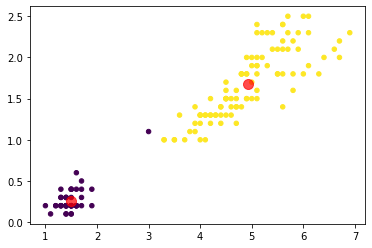

In [8]:
plt.scatter(iris['petal length'], iris['petal width'], c=y_pred, s=20)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.7)
plt.show()

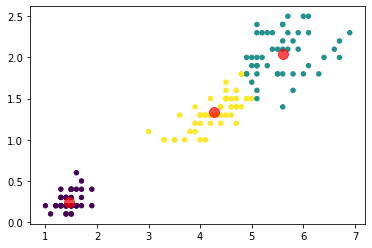

In [9]:
kmeans3=KMeans(n_clusters=3, random_state=42)
kmeans3.fit(iris)

y_pred3=kmeans3.predict(iris)

centers3=kmeans3.cluster_centers_
centers3

plt.scatter(iris['petal length'], iris['petal width'], c=y_pred3, s=20)
plt.scatter(centers3[:, 0], centers3[:, 1], c='red', s=100, alpha=0.7)
plt.show()

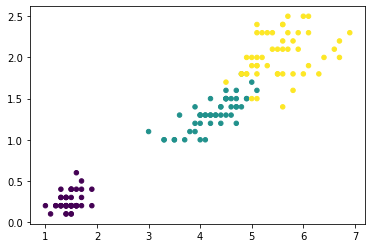

In [10]:
plt.scatter(iris['petal length'], iris['petal width'], c=y_true, s=20)
plt.show()

## Elbow Method for Finding the Optimal Number of Clusters

*Inertia* is the sum of squared distances of samples to the nearest cluster centre. We want this parameter to be reasonably small.

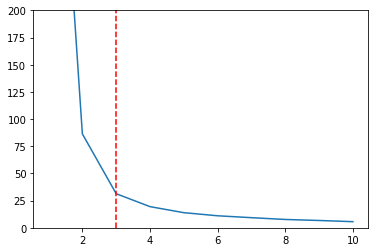

In [12]:
nclust=[]
inertia=[]

for n in range(1, 11):
  nclust.append(n)
  km=KMeans(n_clusters=n)
  km.fit(iris)
  inertia.append(km.inertia_)

plt.plot(nclust, inertia, '-')

plt.ylim(0, 200)
plt.axvline(3, ls='--', color='red')

plt.show()